---

# <center> ★ Machine Learning Project - Boston Housing Price Prediction ★

---

<img src="bh.jpg" style="width: 500px;"/>

---

### Description:

Housing Values in Suburbs of Boston
The medv variable is the target variable. \
The Boston data frame has 506 rows and 14 columns.

**This data frame contains the following columns:**

* crim --> per capita crime rate by town.

* zn --> proportion of residential land zoned for lots over 25,000 sq.ft.

* indus --> proportion of non-retail business acres per town.

* chas --> Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* nox --> nitrogen oxides concentration (parts per 10 million).

* rm --> average number of rooms per dwelling.

* age --> proportion of owner-occupied units built prior to 1940.

* dis --> weighted mean of distances to five Boston employment centres.

* rad --> index of accessibility to radial highways.

* tax --> full-value property-tax rate per \$10,000.

* ptratio --> pupil-teacher ratio by town.

* black --> 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

* lstat --> lower status of the population (percent).

* medv --> median value of owner-occupied homes in \$1000s.

**Source**
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.
Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


### Objective:
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the sales w.r.t a single & multiple feature.
- Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

---

# <center>1. Data Exploration

In [1]:
#Importing the basic librarires

import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset

from sklearn.datasets import load_boston

X = load_boston().data
Y = load_boston().target

target = 'MEDV'
features = load_boston().feature_names

df = pd.DataFrame(X, columns=features)
df['MEDV'] = Y
original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2



Inference: The Datset consists of 14 features & 506 samples.


In [3]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

CHAS         2
RAD          9
ZN          26
PTRATIO     46
TAX         66
INDUS       76
NOX         81
MEDV       229
AGE        356
B          357
DIS        412
RM         446
LSTAT      455
CRIM       504
dtype: int64

In [8]:
#Checking the stats of all the columns

display(df.describe())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Inference:** The stats seem to be fine, let us do further analysis on the Dataset

---

# <center> 2. Exploratory Data Analysis (EDA)

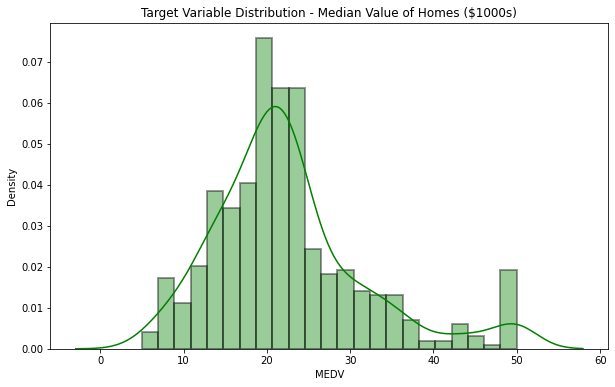

In [10]:
#Let us first analyze the distribution of the target variable

sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title('Target Variable Distribution - Median Value of Homes ($1000s)')
plt.show()

**Inference:**The Target Variable seems to be be normally distributed, averaging around $21000(units)

                                         Visualising Categorical Features:                                          


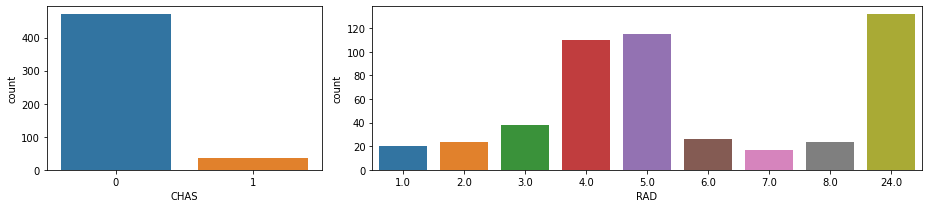

In [11]:
#Visualising the categorical features 

cf = ['CHAS','RAD']
df['CHAS'] = df['CHAS'].astype(int)

print('\033[1mVisualising Categorical Features:'.center(120))

f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]}, figsize=[13,3])
sns.countplot(df[cf[0]], ax=a0)
sns.countplot(df[cf[1]], ax=a1)
f.tight_layout()
f.show()

**Inference:** The CHAS feature is binary & the RAD feature is ordinal, hence we shall not create any dummy variables with one hot encoding.

                                                Numeric Features Distribution                                                 


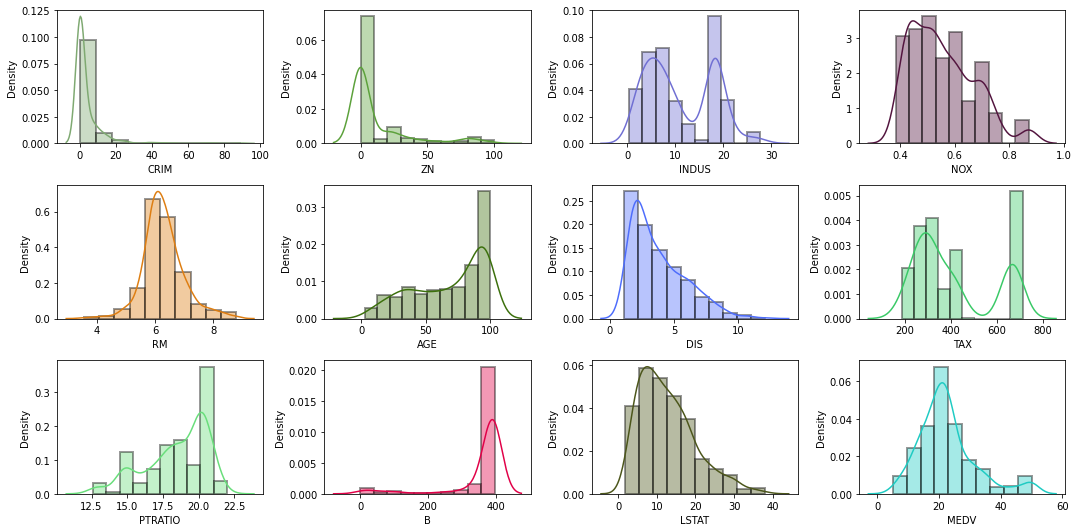

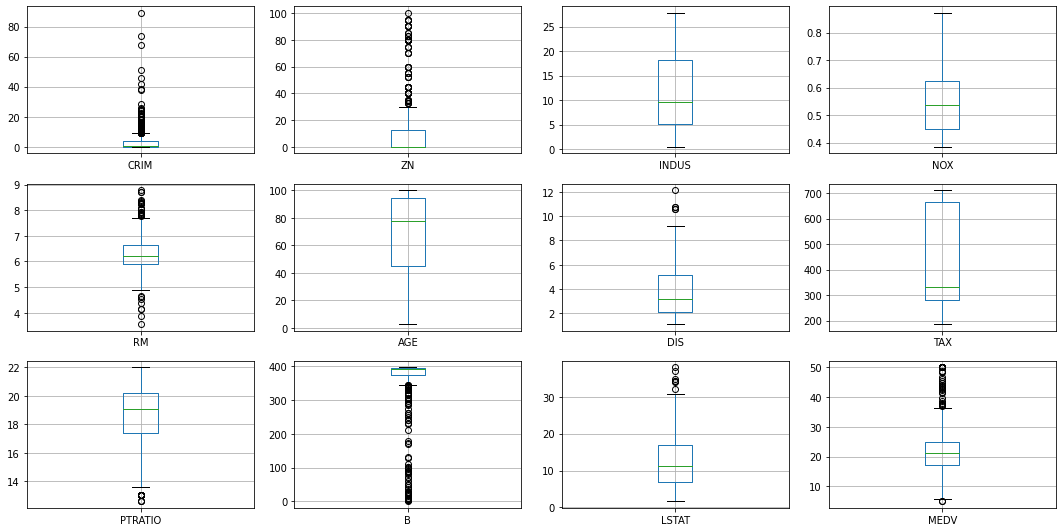

In [12]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

nf = [i for i in df.columns if i not in cf]

plt.figure(figsize=[15,7.5])
for i in range(12):
    plt.subplot(3,4,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,7.5])
for i in range(12):
    plt.subplot(3,4,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

**Inference:** There seem to be many outliers. let us fix these in the upcoming section...

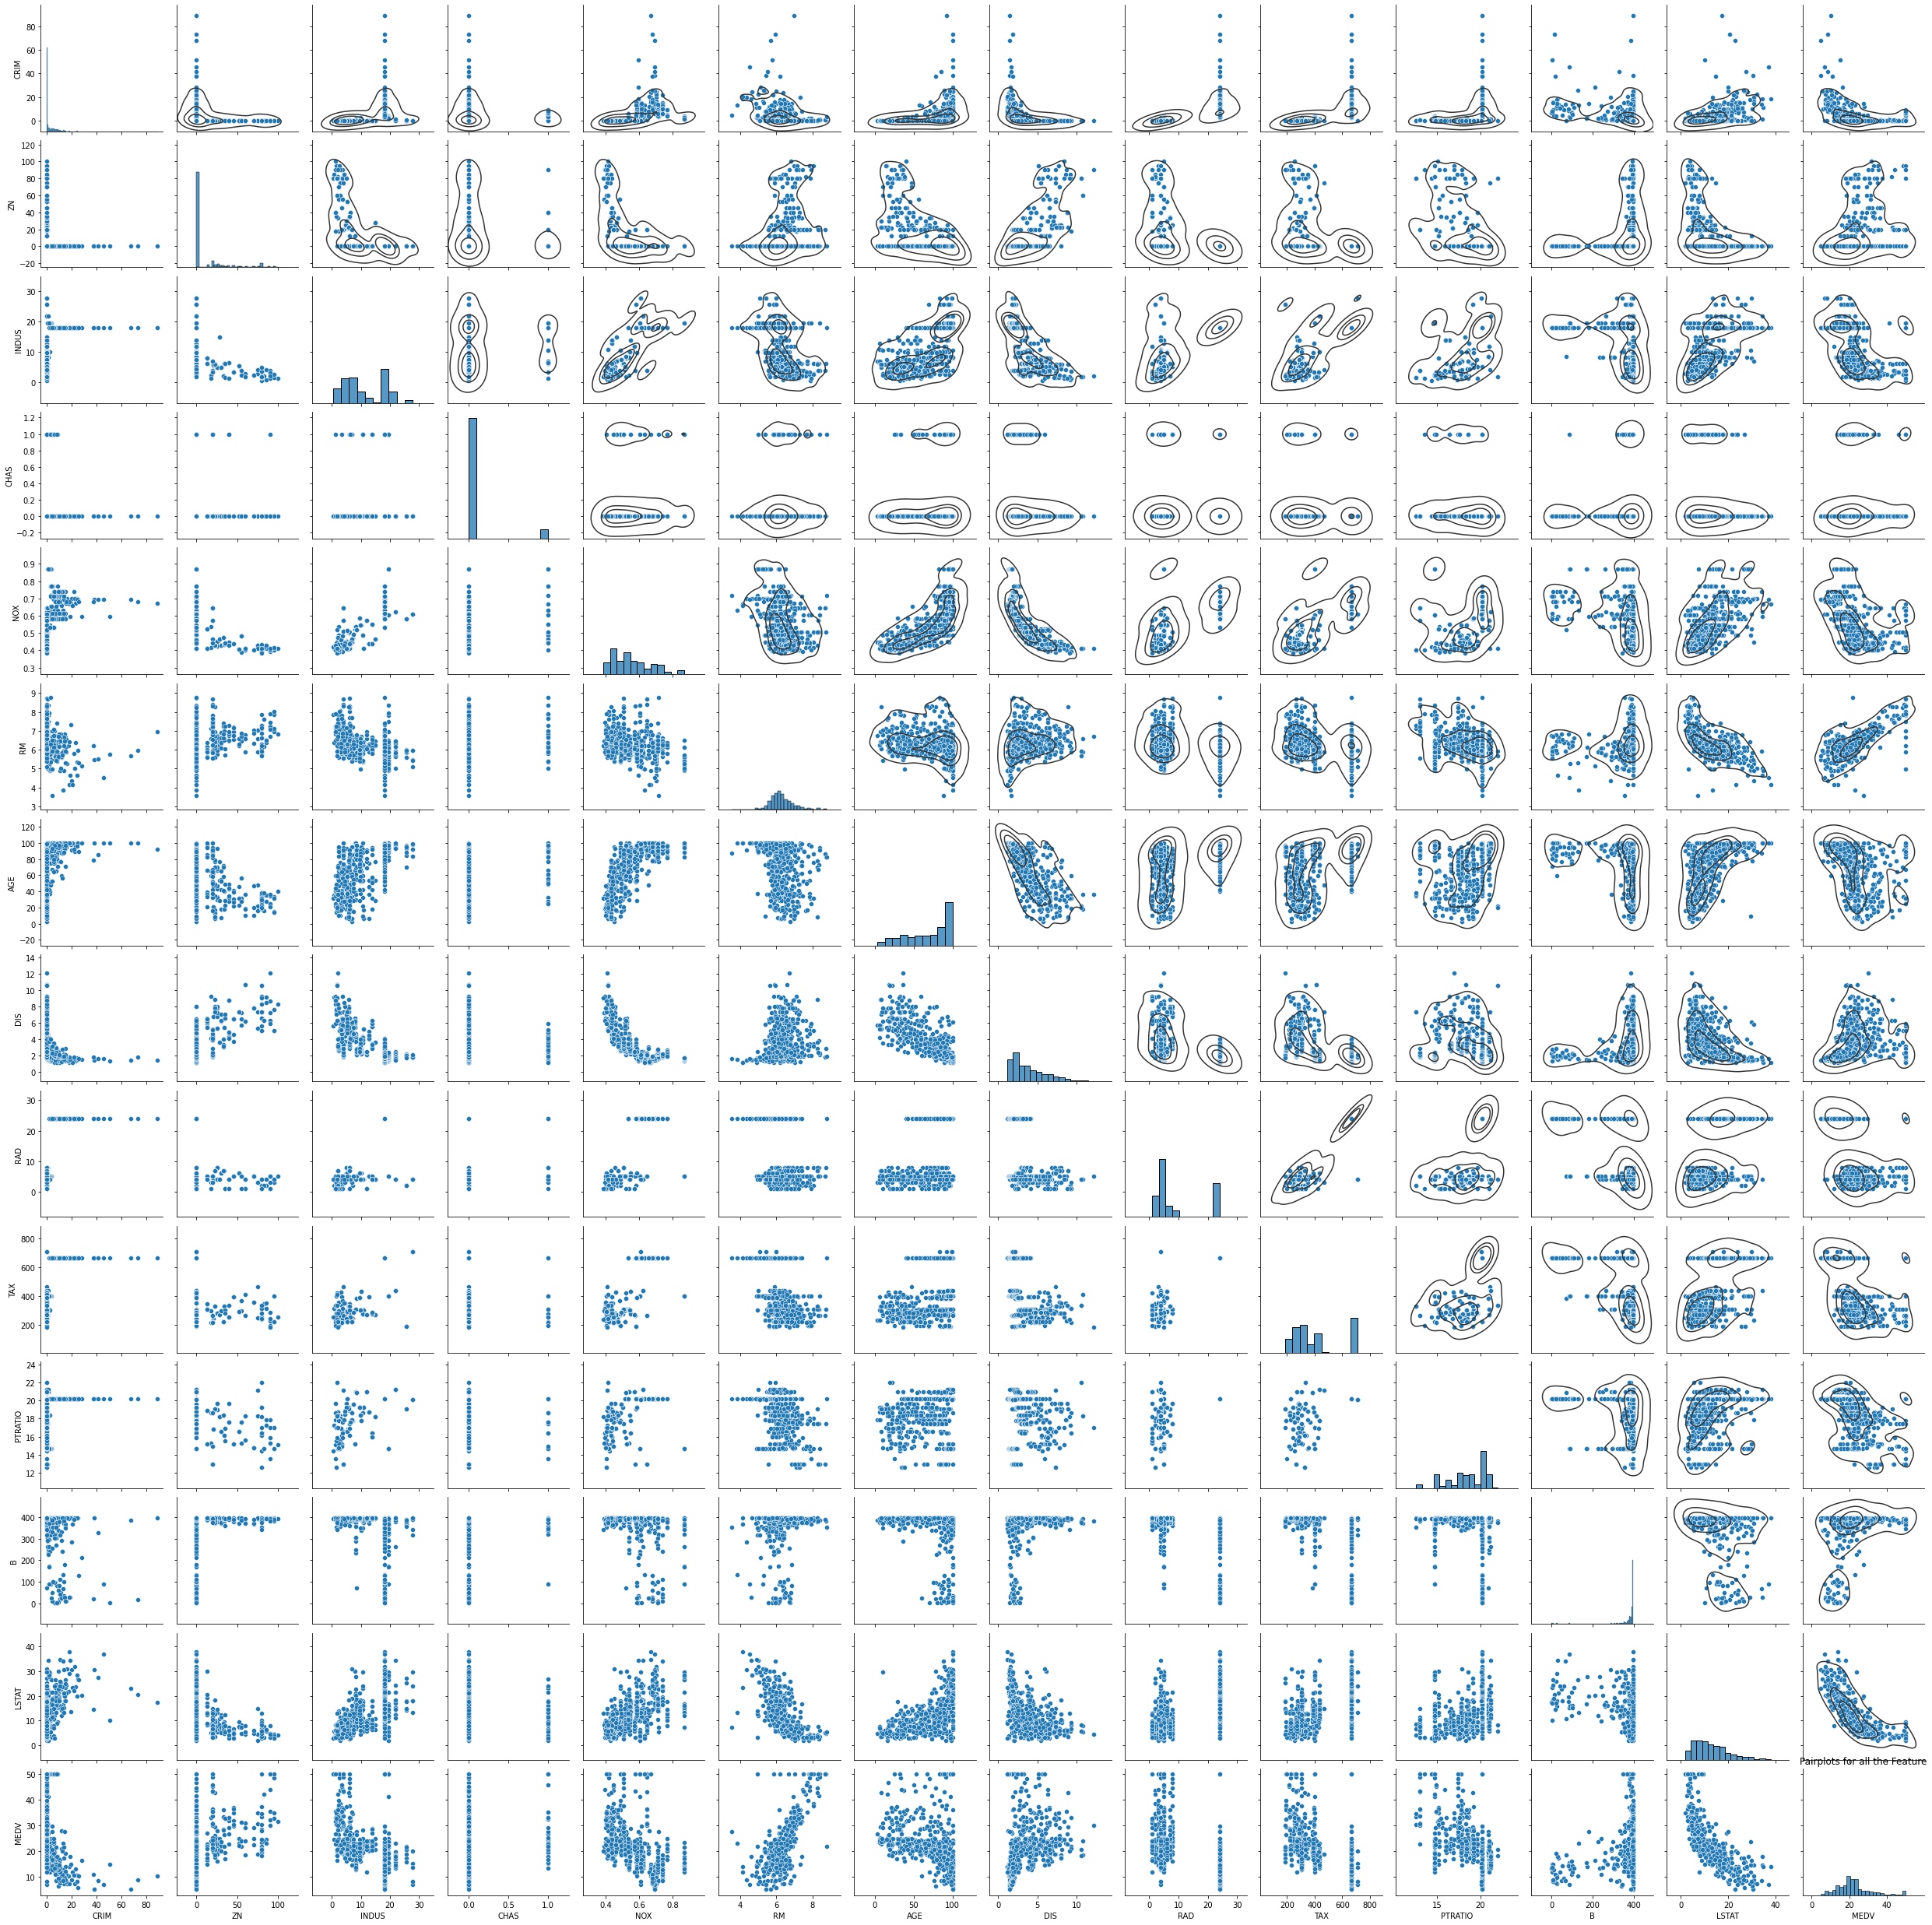

In [89]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

**Inference:** We can notice that some features have linear relationship, let us futher analyze the detect multicollinearity.

---

# <center> 3. Data Preprocessing

In [13]:
#Check for empty elements

print(df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset had {} inconsistant/null elements which were dropped.'.format(original_df.shape[0]-df.shape[0]))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Inference: The dataset had 0 inconsistant/null elements which were dropped.


In [14]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {r-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [16]:
#Removal of outlier:

df1 = df.copy()

features1 = [i for i in features if i not in ['CHAS','RAD']]

for i in features1:
    Q1 = df1[i].quantile(0.10)
    Q3 = df1[i].quantile(0.90)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m After removal of outliers, The dataset now has {} features & {} samples.'.format(df1.shape[1], df1.shape[0]))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2



Inference: After removal of outliers, The dataset now has 14 features & 465 samples.


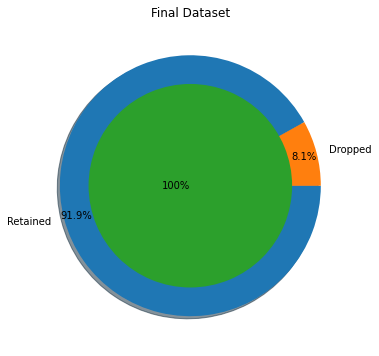


Inference: After the cleanup process, 41 samples were dropped, while retaining 8.1% of the data.


In [17]:
#Final Dataset size after performing Preprocessing

df = df1.copy()

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

---

# <center> 4. Data Manipulation

In [213]:
#Splitting the data intro training & testing sets

from sklearn.model_selection import train_test_split

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (465, 13) (465,) 
Training set  --->  (372, 13) (372,) 
Testing set   --->  (93, 13)  (93,)


In [214]:
#Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02
mean,-4.178259e-17,8.356517e-18,8.953411e-18,3.103849e-17,3.103849e-17,-5.968941e-17,3.103849e-16,-1.933937e-16,-5.252668e-17,5.730183e-17,3.533613e-16,-9.239921e-16,-3.903687e-16
std,1.001347e+00,1.001347e+00,1.001347e+00,1.001347e+00,1.001347e+00,1.001347e+00,1.001347e+00,1.001347e+00,1.001347e+00,1.001347e+00,1.001347e+00,1.001347e+00,1.001347e+00
min,-4.971192e-01,-5.033269e-01,-1.484429e+00,-2.852987e-01,-1.418047e+00,-3.898971e+00,-2.230612e+00,-1.334544e+00,-9.250152e-01,-1.268353e+00,-2.594483e+00,-6.425788e+00,-1.491301e+00
25%,-4.817866e-01,-5.033269e-01,-8.253135e-01,-2.852987e-01,-8.642677e-01,-6.059159e-01,-8.864674e-01,-8.260608e-01,-5.470156e-01,-6.961948e-01,-6.378874e-01,-2.880103e-02,-7.724841e-01
50%,-4.511783e-01,-5.033269e-01,-3.519889e-01,-2.852987e-01,-2.313770e-01,-1.464857e-01,2.551829e-01,-2.482750e-01,-4.210157e-01,-4.800459e-01,1.356505e-01,3.658116e-01,-2.342036e-01
75%,-1.085079e-01,3.275477e-01,1.116644e+00,-2.852987e-01,5.948969e-01,4.815201e-01,9.333651e-01,6.755054e-01,-4.301609e-02,2.891896e-01,8.636861e-01,5.038690e-01,5.878302e-01
max,5.545112e+00,3.651046e+00,2.538093e+00,3.505098e+00,2.853965e+00,3.478772e+00,1.159426e+00,3.981931e+00,1.972982e+00,2.062882e+00,1.682726e+00,5.038690e-01,3.397987e+00



                                          Standardardization on Testing set                                          


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,0.173539,0.051930,0.007258,-0.040757,-0.105687,-0.085722,-0.019728,0.161974,0.035564,0.023413,0.050028,0.029533,0.089835
std,1.365729,0.999648,1.031137,0.936234,0.953317,0.955735,0.967894,1.107545,1.037345,1.028662,0.962255,0.880045,0.991718
min,-0.495481,-0.503327,-1.443142,-0.285299,-1.356516,-3.083305,-2.104926,-1.330966,-0.925015,-1.261996,-2.412474,-3.604365,-1.279689
25%,-0.478889,-0.503327,-0.786976,-0.285299,-0.943379,-0.613691,-0.806168,-0.715967,-0.547016,-0.696195,-0.637887,0.090458,-0.656689
50%,-0.440943,-0.503327,-0.351989,-0.285299,-0.196216,-0.189601,0.126005,-0.115132,-0.421016,-0.480046,0.272157,0.379054,0.077296
75%,-0.171743,0.327548,1.116644,-0.285299,0.331192,0.367369,0.901071,1.000917,-0.043016,0.320976,0.863686,0.503869,0.490163
max,5.486137,3.235609,2.538093,3.505098,2.853965,3.371336,1.159426,3.297266,1.972982,2.062882,1.318708,0.503869,3.871526


---

# <center> 5. Feature Selection/Extraction

                             Correlation Matrix                             


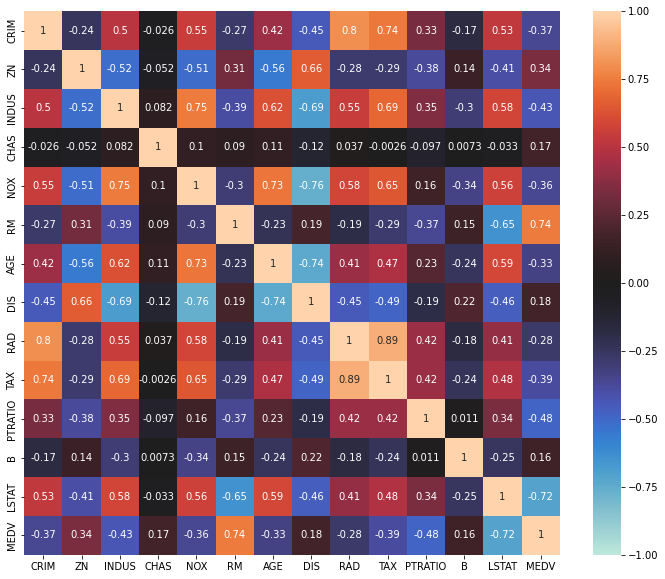

In [22]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(80))
plt.figure(figsize=[12,10])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #center=0, 
plt.show()

**Inference:** There seems to be strong multi-correlation between the features. Let us try to fix these...

In [23]:
#Testing a Linear Regression model with statsmodels

from statsmodels.formula import api

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     81.16
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           3.54e-98
Time:                        15:09:53   Log-Likelihood:                -1093.2
No. Observations:                 372   AIC:                             2214.
Df Residuals:                     358   BIC:                             2269.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6530      0.242     97.891      0.000      23.178      24.128
CRIM          -0.5176      0.454     -1.140      0.255      -1.410       0.375
ZN             1.0516      0.357      2.949      0.003       0.350       1.753
INDUS          0.4698      0.477      0.986      0.325      -0.467       1.407
CHAS           1.0083      0.249      4.042      0.000       0.518       1.499
NOX           -1.6584      0.508     -3.261      0.001      -2.658      -0.658
RM             3.2272      0.343      9.399      0.000       2.552       3.902
AGE           -0.1371      0.425     -0.323      0.747      -0.972       0.698
DIS           -2.6914      0.466     -5.773      0.000      -3.608      -1.774
RAD            2.4535      0.668      3.674      0.000       1.140       3.767
TAX           -2.0958      0.668     -3.136      0.002      -3.410      -0.782
PTRATIO       -1.9388      0.316     -6.142      0.000      -2.560      -1.318
B             -0.0825      0.260     -0.317      0.751      -0.594       0.429
LSTAT         -3.6282      0.416     -8.722      0.000      -4.446      -2.810
==============================================================================
Omnibus:                      121.984   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              598.643
Skew:                           1.313   Prob(JB):                    1.01e-130
Kurtosis:                       8.633   Cond. No.                         9.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 ---

**Inference:** 
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)
3. Feature Elmination using PCA Decomposition

## 5a. Manual Method - VIF

Dropped Features -->  ['TAX', 'NOX', 'RAD', 'DIS', 'LSTAT', 'INDUS', 'AGE', 'PTRATIO', 'RM']


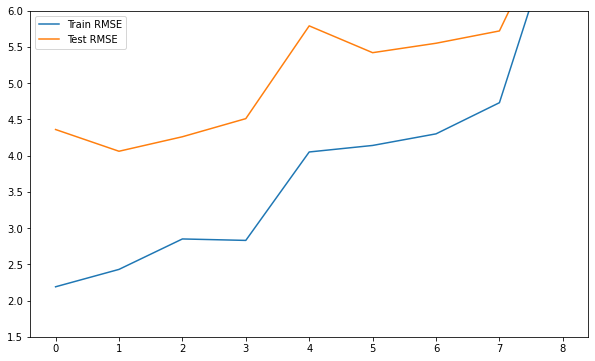

In [193]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

DROP=[];b=[]

for i in range(len(dfx.columns)-1):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>=1.1:
        DROP.append(vif.loc[0][0])
        #print(DROP)
        for k in range(2,n):
            #print(f'{i} Degree')
            poly_reg = PolynomialFeatures(degree=k)
            X_poly = poly_reg.fit_transform(Train_X_std.drop(DROP,axis=1))
            X_poly1 = poly_reg.transform(Test_X_std.drop(DROP,axis=1))
            LR = LinearRegression()
            LR.fit(X_poly, Train_Y)

            pred1 = LR.predict(X_poly)
            #Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

            pred2 = LR.predict(X_poly1)
            Trd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
            Tsd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)
            #Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
        
print('Dropped Features --> ',DROP)
#plt.plot(b)
#plt.show()
#print(API.summary())

# plt.figure(figsize=[20,4])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trd[:9], label='Train RMSE')
plt.plot(Tsd[:9], label='Test RMSE')
plt.ylim([1.5,6])
plt.legend()
plt.show()

## 5b. Automatic Method - RFE

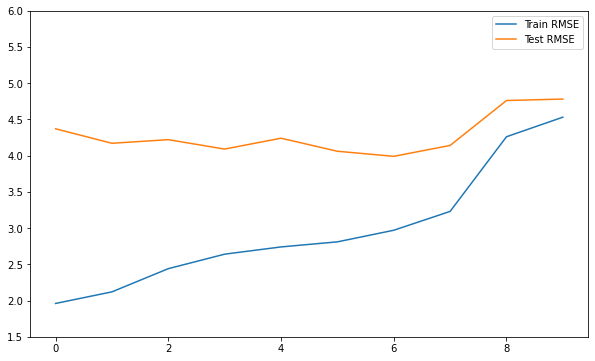

In [191]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-4
for i in range(m):
    lm = LinearRegression()
    lm.fit(Train_X_std, Train_Y)

    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X, Train_Y)

    Train_xy = pd.concat([Train_X_std[Train_X.columns[rfe.support_]],Train_Y.reset_index(drop=True)],axis=1)
    a = Train_xy.columns.values.tolist()
    a.remove(target)

    API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in a)), data=Train_xy).fit()
    for k in range(2,n):
        #print(f'{i} Degree')
        poly_reg = PolynomialFeatures(degree=k)
        X_poly = poly_reg.fit_transform(Train_X_std.loc[:,rfe.support_])
        X_poly1 = poly_reg.transform(Test_X_std.loc[:,rfe.support_])
        LR = LinearRegression()
        LR.fit(X_poly, Train_Y)

        pred1 = LR.predict(X_poly)
        #Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

        pred2 = LR.predict(X_poly1)
        Trd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
        Tsd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)
        #Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
        
# plt.figure(figsize=[20,4])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trd, label='Train RMSE')
plt.plot(Tsd, label='Test RMSE')
plt.ylim([1.5,6])
plt.legend()
plt.show()

## 5c. Feature Elmination using PCA Decomposition

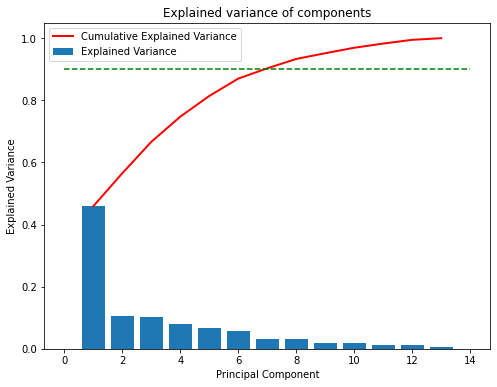

In [167]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.show()

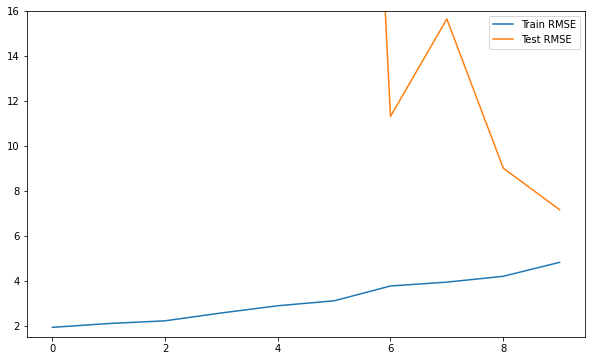

In [195]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-4

for i in range(m):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)
    for k in range(2,n):
        #print(f'{i} Degree')
        poly_reg = PolynomialFeatures(degree=k)
        X_poly = poly_reg.fit_transform(Train_X_std_pca)
        X_poly1 = poly_reg.transform(Test_X_std_pca)
        LR = LinearRegression()
        LR.fit(X_poly, Train_Y)

        pred1 = LR.predict(X_poly)
        #Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

        pred2 = LR.predict(X_poly1)
        Trd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
        Tsd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)
        #Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

# plt.figure(figsize=[20,4.5])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trd, label='Train RMSE')
plt.plot(Tsd, label='Test RMSE')
plt.ylim([1.5,16])
plt.legend()
plt.show()

In [174]:
# #Applying PCA Transformations

# pca = PCA(n_components=13)

# Train_X_std_pca = pca.fit_transform(Train_X_std)
# print('The shape of final transformed training feature set:')
# print(Train_X_std_pca.shape)
# Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

# Test_X_std_pca = pca.transform(Test_X_std)
# print('\nThe shape of final transformed testing feature set:')
# print(Test_X_std_pca.shape)
# Test_X_std_pca = pd.DataFrame(Test_X_std_pca)

### Conclusion:
It is clear that the performance of the modelsis quiet comparable unpon dropping features using VIF, RFE & PCA Techniques. Comparing the RMSE plots, the optimal values were found for dropping 6 features using automated RFE Technique. 

In [217]:
rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-1)
rfe = rfe.fit(Train_X_std, Train_Y)

Train_X_std = Train_X_std[Train_X.columns[rfe.support_]]
Test_X_std = Test_X_std[Test_X.columns[rfe.support_]]

---

# <center> 6. Predictive Modelling

In [234]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.columns,3)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

---

**Objective:** Let us now try building multiple regression models & compare their evaluation metrics to choose the best fit model both training and testing sets...

## 6a. Multiple Linear Regression(MLR)

<img src="mr.png" style="width: 600px;float: left;"/>

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-0.5175006   1.04770472  0.48304823  1.00374425 -1.64256698  3.22968267
 -0.1357304  -2.67972681  2.4501656  -2.08612607 -1.95172077 -3.61968405]
The Intercept of the Regresion Model was found to be  23.652956989247315


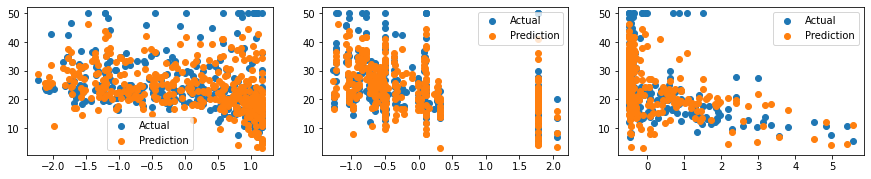



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.75
Residual Sum of Squares (RSS) on Training set  ---> 7777.45
Mean Squared Error (MSE) on Training set       ---> 20.91
Root Mean Squared Error (RMSE) on Training set ---> 4.57

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.65
Residual Sum of Squares (RSS) on Training set  ---> 2268.48
Mean Squared Error (MSE) on Training set       ---> 24.39
Root Mean Squared Error (RMSE) on Training set ---> 4.94

--------------------Residual Plots--------------------


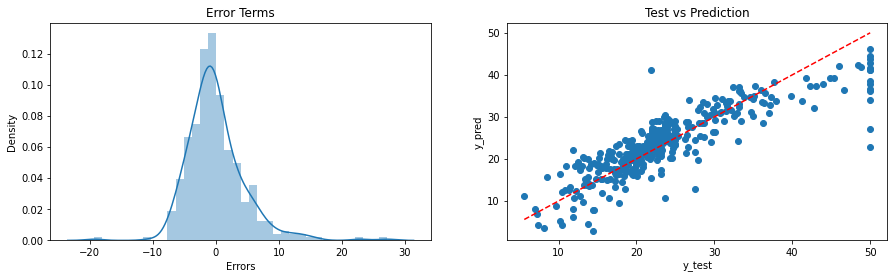

In [235]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

---

## 6b. Ridge Regression Model

<img src="ridge.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-0.5175006   1.04770472  0.48304823  1.00374425 -1.64256698  3.22968267
 -0.1357304  -2.67972681  2.4501656  -2.08612607 -1.95172077 -3.61968405]
The Intercept of the Regresion Model was found to be  23.652956989247315


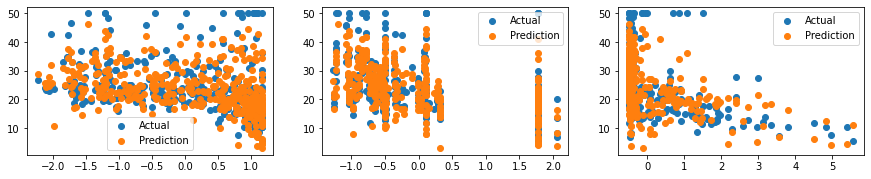



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.75
Residual Sum of Squares (RSS) on Training set  ---> 7777.99
Mean Squared Error (MSE) on Training set       ---> 20.91
Root Mean Squared Error (RMSE) on Training set ---> 4.57

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.65
Residual Sum of Squares (RSS) on Training set  ---> 2266.63
Mean Squared Error (MSE) on Training set       ---> 24.37
Root Mean Squared Error (RMSE) on Training set ---> 4.94

--------------------Residual Plots--------------------


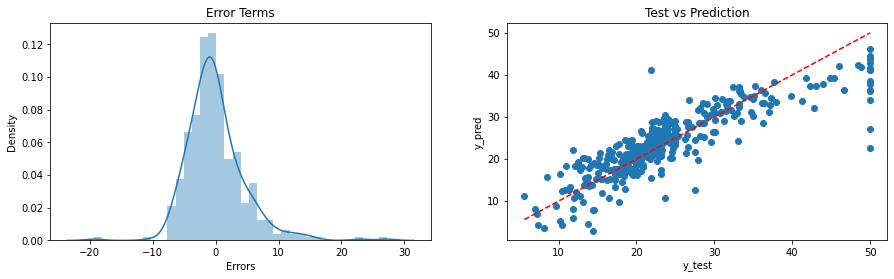

In [236]:
#Creating a Ridge Regression model

from sklearn.linear_model import Ridge

Train_X_std = Train_X_std[Train_X.columns[rfe.support_]]
Test_X_std = Test_X_std[Test_X.columns[rfe.support_]]

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

---

## 6c. Lasso Regression Model

<img src="lasso.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-0.5175006   1.04770472  0.48304823  1.00374425 -1.64256698  3.22968267
 -0.1357304  -2.67972681  2.4501656  -2.08612607 -1.95172077 -3.61968405]
The Intercept of the Regresion Model was found to be  23.652956989247315


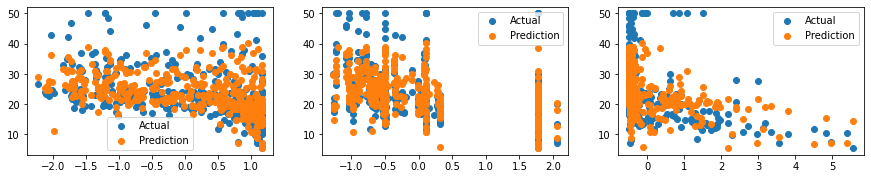



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.68
Residual Sum of Squares (RSS) on Training set  ---> 9803.74
Mean Squared Error (MSE) on Training set       ---> 26.35
Root Mean Squared Error (RMSE) on Training set ---> 5.13

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.63
Residual Sum of Squares (RSS) on Training set  ---> 2437.65
Mean Squared Error (MSE) on Training set       ---> 26.21
Root Mean Squared Error (RMSE) on Training set ---> 5.12

--------------------Residual Plots--------------------


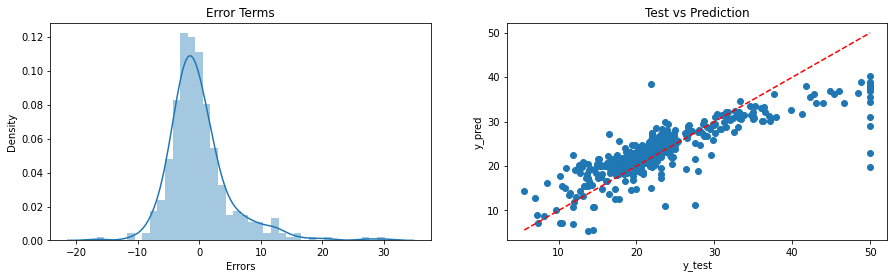

In [237]:
#Creating a Ridge Regression model

from sklearn.linear_model import Lasso

Train_X_std = Train_X_std[Train_X.columns[rfe.support_]]
Test_X_std = Test_X_std[Test_X.columns[rfe.support_]]

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

---

## 6d. Elastic-Net Regression

<img src="en.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-0.5175006   1.04770472  0.48304823  1.00374425 -1.64256698  3.22968267
 -0.1357304  -2.67972681  2.4501656  -2.08612607 -1.95172077 -3.61968405]
The Intercept of the Regresion Model was found to be  23.652956989247315


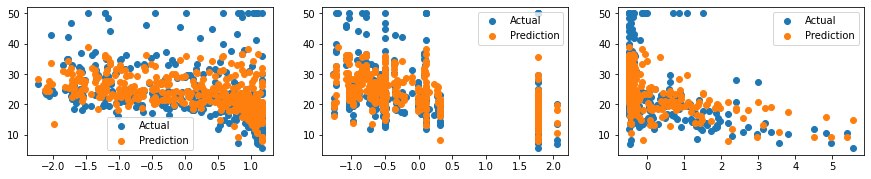



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.65
Residual Sum of Squares (RSS) on Training set  ---> 10642.69
Mean Squared Error (MSE) on Training set       ---> 28.61
Root Mean Squared Error (RMSE) on Training set ---> 5.35

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6
Residual Sum of Squares (RSS) on Training set  ---> 2603.06
Mean Squared Error (MSE) on Training set       ---> 27.99
Root Mean Squared Error (RMSE) on Training set ---> 5.29

--------------------Residual Plots--------------------


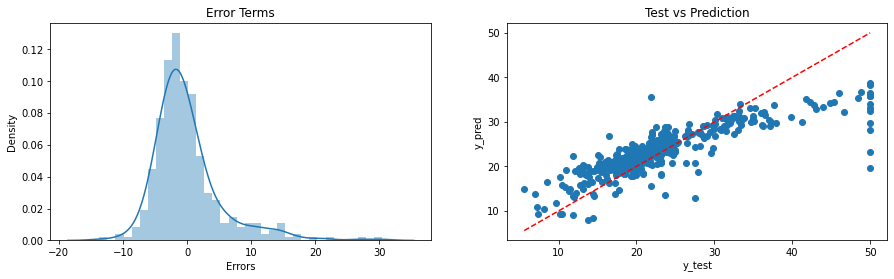

In [238]:
#Creating a ElasticNet Regression model

from sklearn.linear_model import ElasticNet

Train_X_std = Train_X_std[Train_X.columns[rfe.support_]]
Test_X_std = Test_X_std[Test_X.columns[rfe.support_]]

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

---

## 6e. Polynomial Regression Model

<img src="pn.png" style="width: 500px;float: left;"/>

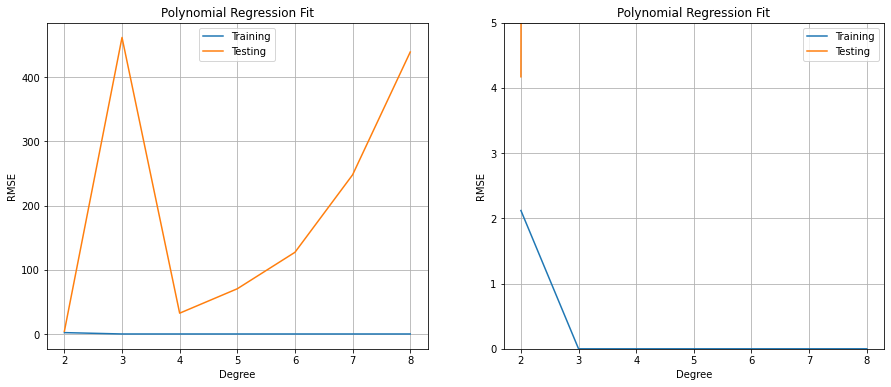

In [239]:
#Checking polynomial regression performance on various degrees

from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]

for i in range(2,9):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,9),Trr, label='Training')
plt.plot(range(2,9),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,9),Trr, label='Training')
plt.plot(range(2,9),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

**Inference:** We can choose 3rd order polynomial regression as it gives the optimal training & testing scores...

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-0.5175006   1.04770472  0.48304823  1.00374425 -1.64256698  3.22968267
 -0.1357304  -2.67972681  2.4501656  -2.08612607 -1.95172077 -3.61968405]
The Intercept of the Regresion Model was found to be  23.652956989247315


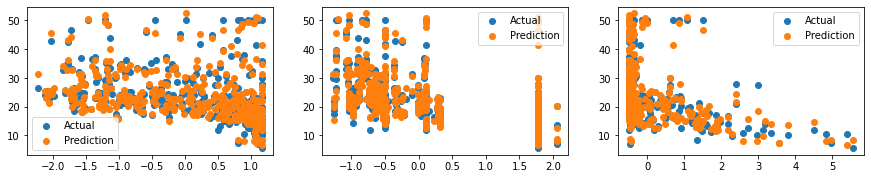



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.95
Residual Sum of Squares (RSS) on Training set  ---> 1674.83
Mean Squared Error (MSE) on Training set       ---> 4.5
Root Mean Squared Error (RMSE) on Training set ---> 2.12

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.75
Residual Sum of Squares (RSS) on Training set  ---> 1617.46
Mean Squared Error (MSE) on Training set       ---> 17.39
Root Mean Squared Error (RMSE) on Training set ---> 4.17

--------------------Residual Plots--------------------


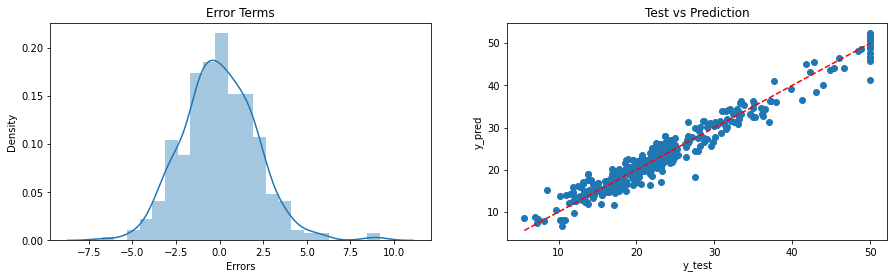

In [244]:
#Using the 3rd Order Polynomial Regression model (degree=3)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

---

### 6f. Comparing the Evaluation Metics of the Models

In [245]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.75,0.65,7777.45,2268.48,20.91,24.39,4.57,4.94
Ridge Linear Regression (RLR),0.75,0.65,7777.99,2266.63,20.91,24.37,4.57,4.94
Lasso Linear Regression (LLR),0.68,0.63,9803.74,2437.65,26.35,26.21,5.13,5.12
Elastic-Net Regression (ENR),0.65,0.60,10642.69,2603.06,28.61,27.99,5.35,5.29
Polynomial Regression (PNR),0.95,0.75,1674.83,1617.46,4.50,17.39,2.12,4.17


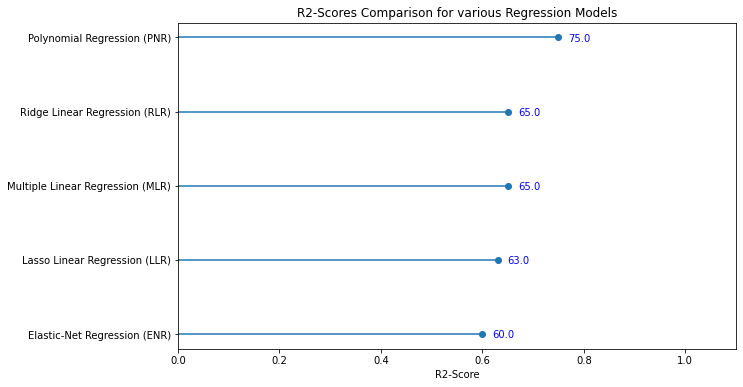

In [246]:
# R2-Scores Comparison for different Regression Models

R2 = EMC['Test-R2'].sort_values(ascending=True)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

**Inference:** From the above plot, it is clear that the polynomial regresion models have the highest explainability power  to understand the dataset.

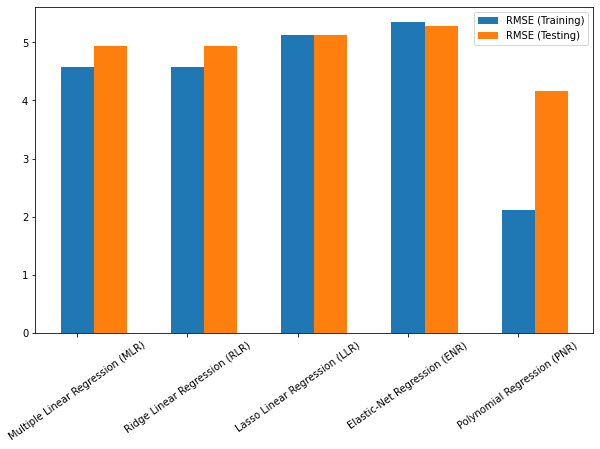

In [247]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5

plt.bar(np.arange(s), Model_Evaluation_Comparison_Matrix[cc[-2]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(s)+0.3, Model_Evaluation_Comparison_Matrix[cc[-1]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(s),EMC.index, rotation =35)
plt.legend()
plt.show()

**Inference:** Lesser the RMSE, better the model! Also, provided the model should have close proximity with the training & testing scores. \
For this problem, it is can be said that polynomial regressions are the best choice to go with...

---

## <center> 10. Project Outcomes & Conclusions

---

### Here are some of the key outcomes of the project:
- The Dataset was quiet small totally just 506 samples & after preprocessing 8.1% of the datasamples were dropped. 
- Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
- The features had high multicollinearity, hence in Feature Extraction step, we used VIF & RFE Techniques to drop highly correlated features.
- Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
- While, Polynomial Regression (Order-2) gave the best overall scores for the current dataset, yet it wise to also consider simpler models like MLR & ENR as they are more generalisable.

In [ ]:
<<<----------------------------------------------THE END---------------------------------------------------------->>>